In [93]:
# Import the required libraries and dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt



In [94]:
# Read the data from the csv into a Pandas DataFrame with the first column as row index
music_mental_health_df = pd.read_csv("Resources/mxmh_survey_results.csv")

#Drop timestamp column
music_mental_health_df = music_mental_health_df.drop(columns=["Timestamp"])

#dropping all null and NaN values
music_mental_health_df = music_mental_health_df.dropna()


# Review the DataFrame
music_mental_health_df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [95]:
#read data types
music_mental_health_df.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


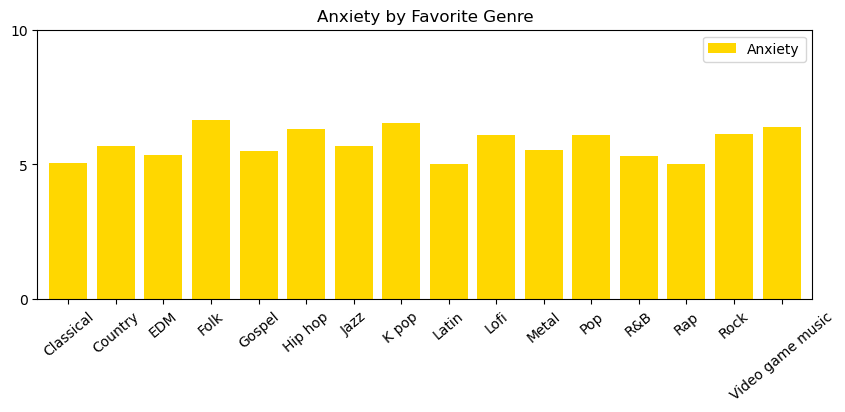

In [96]:
# Create a bar chart to chart the correlation between Anxiety and Fav genre
genre_anxiety_df = music_mental_health_df[["Fav genre", "Anxiety"]]
fav_genre = genre_anxiety_df.groupby("Fav genre").mean()
fav_genre_chart = fav_genre.plot.bar(y='Anxiety', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='Anxiety by Favorite Genre',
                                    yticks=[0,5,10], xlabel='', color='gold')

In [97]:
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age","Hours per day"]]
df_lofi = df[df["Fav genre"]=='Lofi']
df_lofi[["Depression","BPM","OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,0.128445,-0.135977,0.317385,0.004526,0.605983,-0.396628
BPM,0.128445,1.000000,0.838936,0.498297,0.530213,0.111947,0.342493
OCD,-0.135977,0.838936,1.000000,0.583753,0.273805,-0.068341,0.197853
Anxiety,0.317385,0.498297,0.583753,1.000000,0.141651,0.439378,-0.132489
Insomnia,0.004526,0.530213,0.273805,0.141651,1.000000,-0.102015,0.414496
Age,0.605983,0.111947,-0.068341,0.439378,-0.102015,1.000000,-0.475404
Hours per day,-0.396628,0.342493,0.197853,-0.132489,0.414496,-0.475404,1.000000


In [98]:
average_anxiety = df_lofi['Anxiety'].mean()
print(average_anxiety)

6.1


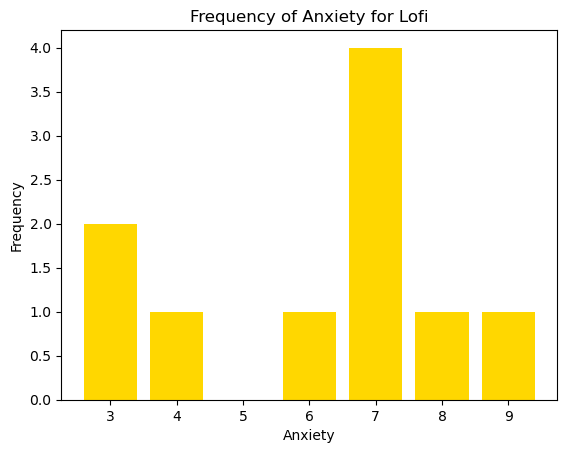

In [175]:
# View graphs on the distribution of the sample data
# Anxiety
anxiety_dist = df_lofi['Anxiety']
freq_anx_counts = anxiety_dist.value_counts()
plt.bar(freq_anx_counts.index, freq_anx_counts.values, color="gold")
plt.xlabel('Anxiety')
plt.ylabel('Frequency')
plt.title('Frequency of Anxiety for Lofi')
plt.show()

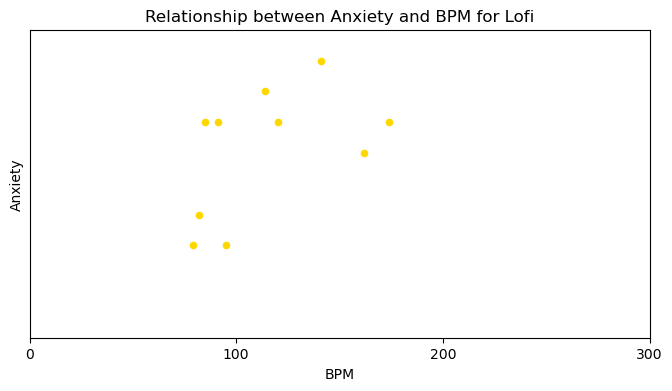

In [176]:
# Create a scatterplot to chart the correlation between anxiety and bpm
bpm_anxiety = df_lofi.plot.scatter(x="BPM",y="Anxiety",title="Relationship between Anxiety and BPM for Lofi", figsize=(8,4),
                                        xlabel="BPM",ylabel="Anxiety",color="gold",
                                        xlim=(0,300),ylim=(0,10),xticks=(0,100,200,300),yticks=())

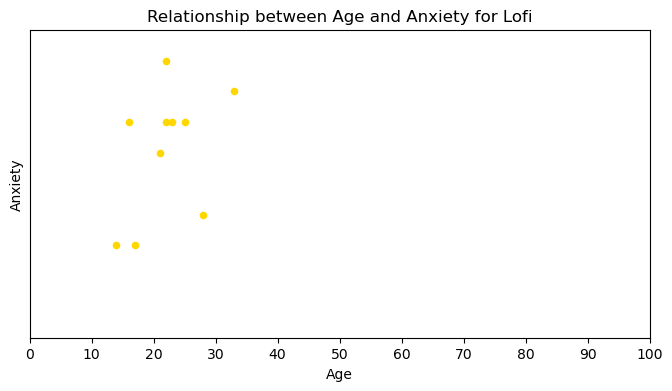

In [177]:
# Create a scatter plot to chart the correlation between anxiety and age
age_anxiety = df_lofi.plot.scatter(x="Age",y="Anxiety",title="Relationship between Age and Anxiety for Lofi", figsize=(8,4),
                                        xlabel="Age",ylabel="Anxiety",color="gold",
                                        xlim=(0,100),ylim=(0,10),xticks=(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),yticks=())

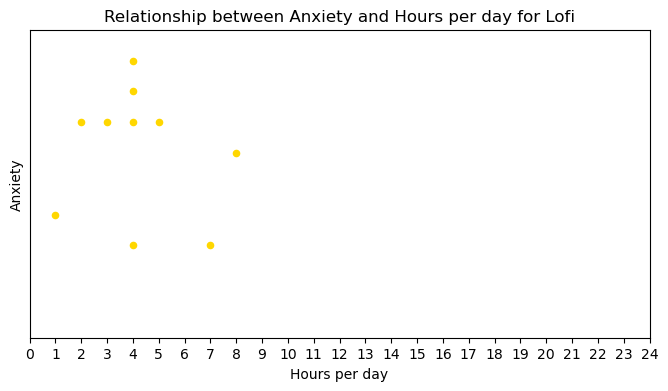

In [178]:
# Create a scatter plot to chart the correlation between anxiety and hours per day
hours_per_day_anxiety = df_lofi.plot.scatter(x="Hours per day",y="Anxiety",title="Relationship between Anxiety and Hours per day for Lofi", figsize=(8,4),
                    xlabel="Hours per day",ylabel="Anxiety",color="gold",
                    xlim=(0,24),ylim=(0,10),xticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24),yticks=())

In [103]:
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age","Hours per day"]]
df_hiphop = df[df["Fav genre"]=='Hip hop']
df_hiphop[["Depression","BPM","OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,-0.213068,-0.101752,0.370190,0.213998,-0.145123,0.383677
BPM,-0.213068,1.000000,0.103311,-0.245486,0.132909,0.156195,0.171723
OCD,-0.101752,0.103311,1.000000,0.103909,-0.025674,0.058400,-0.164018
Anxiety,0.370190,-0.245486,0.103909,1.000000,-0.082725,-0.220458,-0.022629
Insomnia,0.213998,0.132909,-0.025674,-0.082725,1.000000,0.260482,0.445824
Age,-0.145123,0.156195,0.058400,-0.220458,0.260482,1.000000,-0.233077
Hours per day,0.383677,0.171723,-0.164018,-0.022629,0.445824,-0.233077,1.000000


In [104]:
average_anxiety = df_hiphop['Anxiety'].mean()
print(average_anxiety)

6.3125


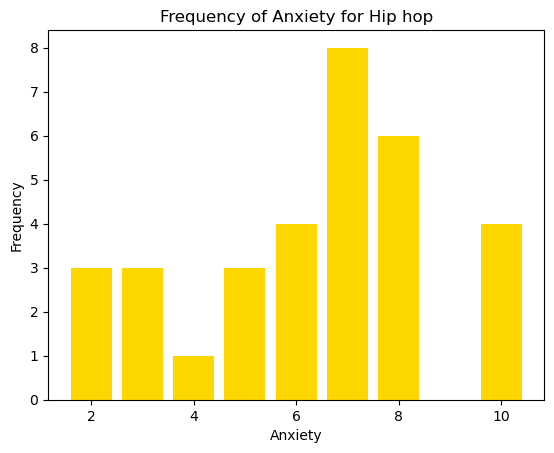

In [179]:
# View graphs on the distribution of the sample data
# Anxiety
anxiety_dist = df_hiphop['Anxiety']
freq_anx_counts = anxiety_dist.value_counts()
plt.bar(freq_anx_counts.index, freq_anx_counts.values, color="gold")
plt.xlabel('Anxiety')
plt.ylabel('Frequency')
plt.title('Frequency of Anxiety for Hip hop')
plt.show()

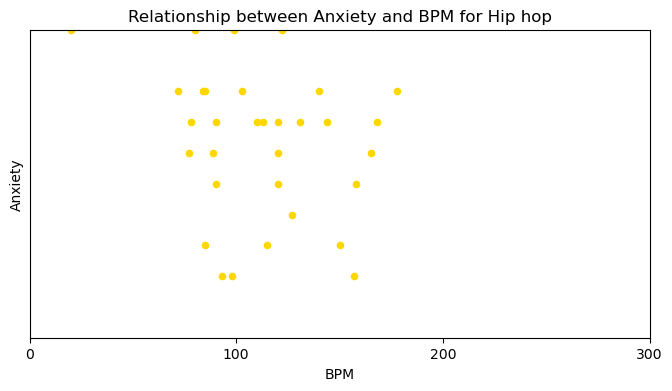

In [180]:
# Create a scatterplot to chart the correlation between anxiety and bpm
bpm_anxiety = df_hiphop.plot.scatter(x="BPM",y="Anxiety",title="Relationship between Anxiety and BPM for Hip hop", figsize=(8,4),
                                        xlabel="BPM",ylabel="Anxiety",color="gold",
                                        xlim=(0,300),ylim=(0,10),xticks=(0,100,200,300),yticks=())

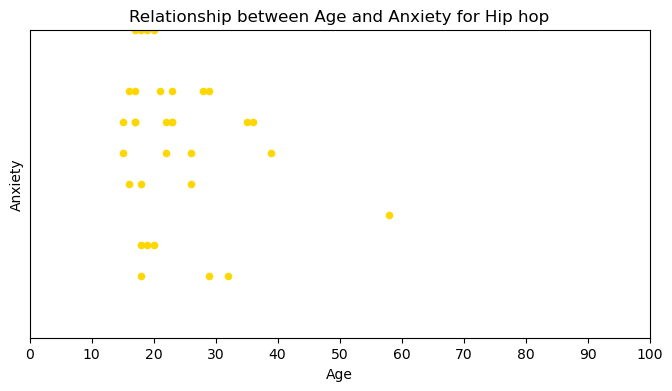

In [181]:
# Create a scatter plot to chart the correlation between anxiety and age
age_anxiety = df_hiphop.plot.scatter(x="Age",y="Anxiety",title="Relationship between Age and Anxiety for Hip hop", figsize=(8,4),
                                        xlabel="Age",ylabel="Anxiety",color="gold",
                                        xlim=(0,100),ylim=(0,10),xticks=(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),yticks=())

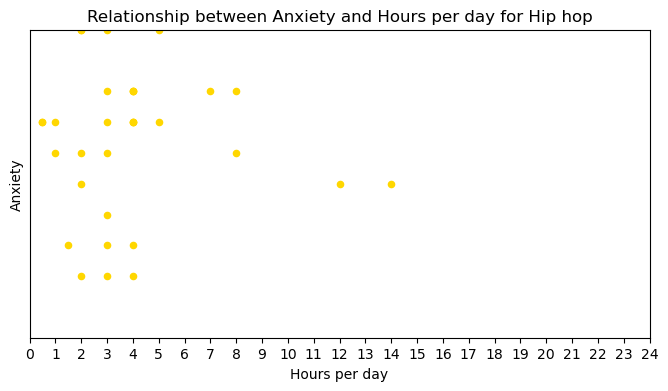

In [182]:
# Create a scatter plot to chart the correlation between anxiety and age
hours_per_day_anxiety = df_hiphop.plot.scatter(x="Hours per day",y="Anxiety",title="Relationship between Anxiety and Hours per day for Hip hop", figsize=(8,4),
                    xlabel="Hours per day",ylabel="Anxiety",color="gold",
                    xlim=(0,24),ylim=(0,10),xticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24),yticks=())

In [109]:
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]]
df_rock = df[df["Fav genre"]=='Rock']
df_rock[["Depression","BPM","OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,0.078411,0.157144,0.589361,0.172273,-0.252970,-0.000346
BPM,0.078411,1.000000,-0.065952,-0.012530,0.067676,0.082998,0.031289
OCD,0.157144,-0.065952,1.000000,0.288805,0.109940,-0.121107,0.104889
Anxiety,0.589361,-0.012530,0.288805,1.000000,0.180522,-0.364729,0.036752
Insomnia,0.172273,0.067676,0.109940,0.180522,1.000000,-0.076783,0.127961
Age,-0.252970,0.082998,-0.121107,-0.364729,-0.076783,1.000000,-0.095655
Hours per day,-0.000346,0.031289,0.104889,0.036752,0.127961,-0.095655,1.000000


In [110]:
average_anxiety = df_rock['Anxiety'].mean()
print(average_anxiety)

6.134228187919463


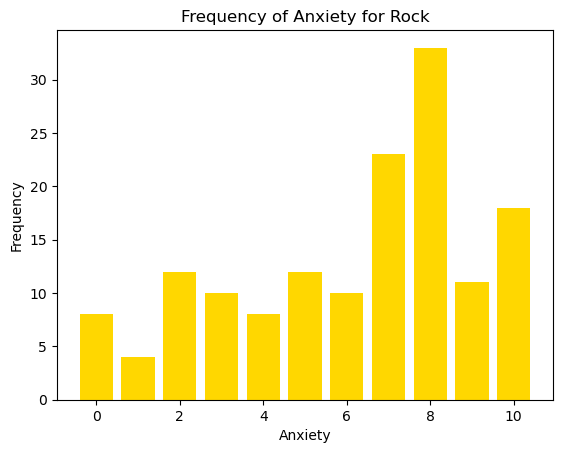

In [183]:
# View graphs on the distribution of the sample data
# Anxiety
anxiety_dist = df_rock['Anxiety']
freq_anx_counts = anxiety_dist.value_counts()
plt.bar(freq_anx_counts.index, freq_anx_counts.values, color="gold")
plt.xlabel('Anxiety')
plt.ylabel('Frequency')
plt.title('Frequency of Anxiety for Rock')
plt.show()

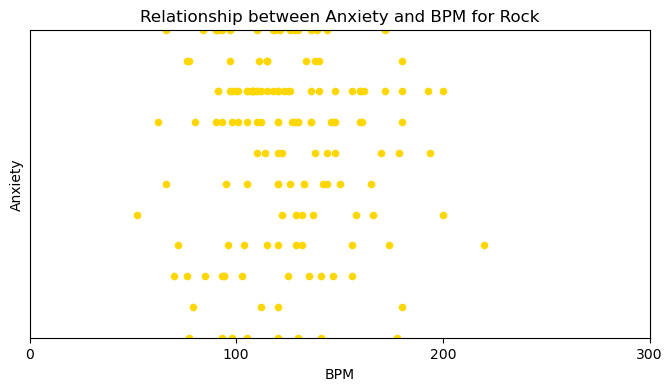

In [184]:
# Create a scatterplot to chart the correlation between anxiety and bpm
bpm_anxiety = df_rock.plot.scatter(x="BPM",y="Anxiety",title="Relationship between Anxiety and BPM for Rock", figsize=(8,4),
                                        xlabel="BPM",ylabel="Anxiety",color="gold",
                                        xlim=(0,300),ylim=(0,10),xticks=(0,100,200,300),yticks=())

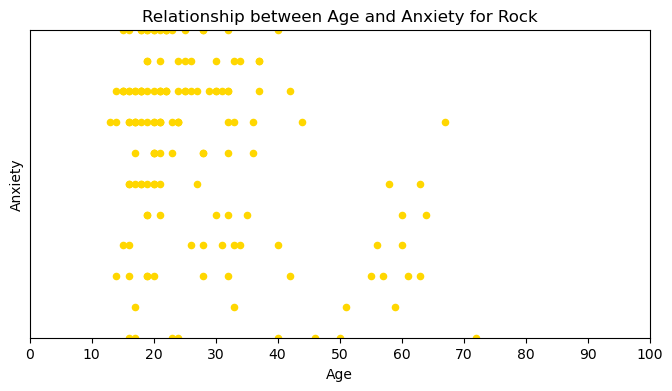

In [185]:
# Create a bar chart to chart the correlation between anxiety and age
age_anxiety = df_rock.plot.scatter(x="Age",y="Anxiety",title="Relationship between Age and Anxiety for Rock", figsize=(8,4),
                                        xlabel="Age",ylabel="Anxiety",color="gold",
                                        xlim=(0,100),ylim=(0,10),xticks=(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),yticks=())

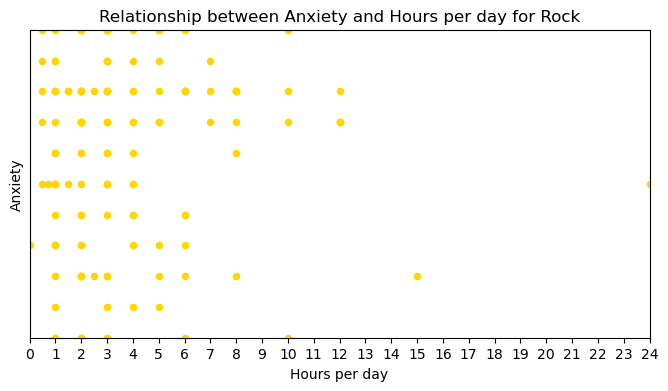

In [186]:
# Create a scatter plot to chart the correlation between anxiety and age
hours_per_day_anxiety = df_rock.plot.scatter(x="Hours per day",y="Anxiety",title="Relationship between Anxiety and Hours per day for Rock", figsize=(8,4),
                    xlabel="Hours per day",ylabel="Anxiety",color="gold",
                    xlim=(0,24),ylim=(0,10),xticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24),yticks=())